<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/Assignments/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2
Instructions: Please work through this notebook. Anything in red requires an answer in a code and/or text cell, as indicated. Please leave all of the text I have written; I have arranged the notebook so that I can easily navigate to your answers and skip my own explanations.

### <font color='magenta'> We will be working through this notebook together as a class today. Whatever we do not get to in class, the remainder will be left self-guided as part of Assignment 2. You can be fairly confident that this guided material will come up in the in-class quiz.

##<font color='blue'>**(Always Run These First)**</font> Part 0.5: Necessary setup cells

In [2]:
# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Setting up file access to the class GH Repo and your personal Google Drive

In [3]:
!git clone https://github.com/cbishop4/MSE7530.git
from google.colab import drive
drive.mount('/content/drive')

fatal: destination path 'MSE7530' already exists and is not an empty directory.


MessageError: Error: credential propagation was unsuccessful

## Part 1: Finishing class walkthrough
This is quite similar to what we went through in class. I have deleted the parts we covered; you may find that you need to insert certain cells of code near the beginning that are used later. These can be found in the Day5_ClassNotes.ipynb notebook in the Class Repo

### Reminder material from class and important equations

Reminder equations:  
Equation for an interferogram at a single wavelength (wavenumber):  
<font size=6>$I(\delta) = \frac{I_{0}}{2}[1 + cos(\frac{2\pi \delta}{\lambda})]  $  </font>  
Equation for an interferogram at multiple wavelengths (wavenumbers):  
<font size=6>$I_{T}(\delta) = \sum_{k=1}^{K}{\frac{I_{k,0}}{2}[1 + cos(\frac{2\pi \delta}{\lambda_{k}})]} $  </font>  

#### Defining instrumental parameters, the sampling interval, and math behind the Interferogram generation and apodization

The "experimental details" of the spectrometer we will "use" (which would be determined by the instrument you are using) are:  
Resolution: $16 ~cm^{-1}$   
Wavenumber range of spectrometer: $3200~ cm^{-1}$ to $470~ cm^{-1}$  
We will collect 989 data points in our interferogram; this would be the total range of distinct mirror distances.  
We calculate our sampling interval, h, based on the wavelength of the calibration laser

In [26]:
lambda_HeNe = 632.8 #nm
h_cm = lambda_HeNe * 10**-7 #nm to cm
h_cm # this is the sampling interval

6.327999999999999e-05

We collect a data point every $6.328 \times 10^{-5}$ cm that the mirror slides.

Using the principle of Fourier transforms, the intensity as a function of retardation over a series of wavelengths (where $\bar{\nu}_{N}$ is the wavenumber equivalent to $\frac{1}{\lambda}$):  
<font size=4>$I(δ_{total}) = B_{1}cos(2π\bar{\nu}_{1}\delta) + B_{2}cos(2π\bar{\nu}_{2}\delta) + ... + B_{N}cos(2π\bar{\nu}_{N}\delta)$ <font color='grey'>(Equation 1)

<font size=4><font color='blue'> **Apodization** </font></font>is a very important concept to deal with real data.  
A true Fourier transform requires data collection from $\delta = -\infty ~to + \infty$, but this is not possible on a real instrument. Additionally, for a real instrument, the signal will decay as the mirror moves further from the beamsplitter. **Apodization is a mathematical process that makes an interferogram recorded at finite retardation diminish in a way that mimics an interferogram recorded to infinite retardation.**  
The Apodization Function is given by:  
<font size=4>$A(\delta) = \frac{1}{2}[1 + cos (\frac{\pi\delta}{\Delta_{maximum}})]$  <font color='grey'> (Equation 2)</font>  
</font>Where $\Delta_{maximum}$ is the total retardation needed to collect a spectrum at a given resolution, and is equal to $\frac{1}{resolution}*k_{max}$ (remember that $k_{max} = n_{points} - 1$



<font color='blue'><font size=4> The proper interferogram must be multiplied by the apodized function, and is therefore given by $I(\delta)A(\delta)$  </font></font>  

Note that NumPy arrays are set up perfectly for this, as they will multiply number-by-number.


<font size=4> Next, we generated interferograms for the single wavenumber ($1500~cm^{-1}$) and two-wavenumber ($1500$ and $3000~cm^{-1}$) cases. Refer to the class notes.

### <font color='red'> Your turn: calculate $I(\delta)~ and~ I(\delta)A(\delta)$ for a three-wavelength case, where $B_{1}$, $B_{2}$, and $B_{3}$ are equal to $0.8$, $0.5$, and $0.7$ for $1500$, $3000$, and $1000~cm^{-1}$, respectively. Note that the wavenumbers are not in sequential order; it does not matter, but they must be in the same order as their corresponding intensity coefficients (Bs).

In [27]:
# your code here - set up numpy arrays of Bs and wavenumbers
Bs = np.array([0.8, 0.5, 0.7])
wavenumber = np.array([1500, 3000, 1000])


In [28]:
# your code here - define constants
h_cm = lambda_HeNe * 10**-7 #cm
ks = np.linspace(0,988,989)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm

<font color='red'>Second cell: Calculate $A(\delta)$ and $I(\delta)$ and save them as variables (these variables will be numpy arrays). Note that the Apodization function has not and does not change regardless of the number of wavenumbers; I have just been re-calculating them in each cell for straightforwardness.

In [29]:
# your code here
I_delta = np.zeros(len(ks))
for i in range(len(Bs)):
  I_delta += Bs[i] * np.cos(2 * np.pi * wavenumber[i] * deltas) # has to be summed up
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))

<font color='red'>Third cell: Calculate $A(\delta)I(\delta)$ and save as a variable (again a numpy array)

In [30]:
# your code here
apodized = A_delta * I_delta

<font color='red'>Fourth cell: Plot the 3 quantities so you can see what you were working with

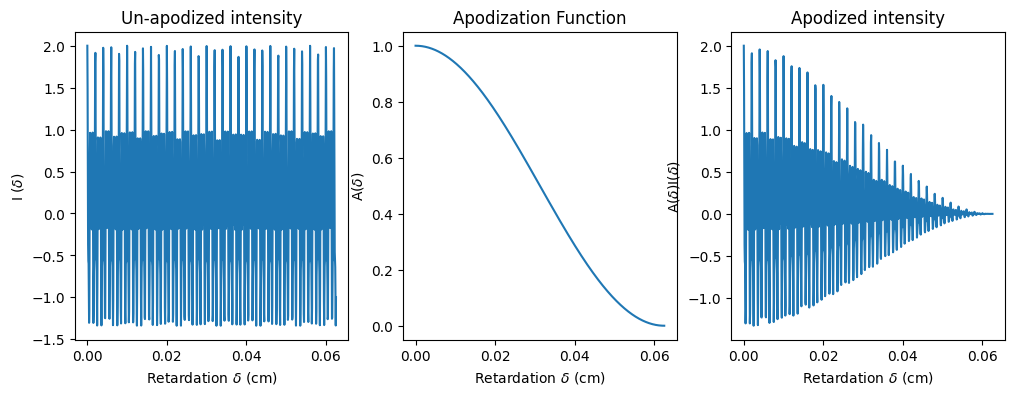

In [31]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
ax[0].plot(deltas,I_delta)
ax[1].plot(deltas,A_delta)
ax[2].plot(deltas,apodized)

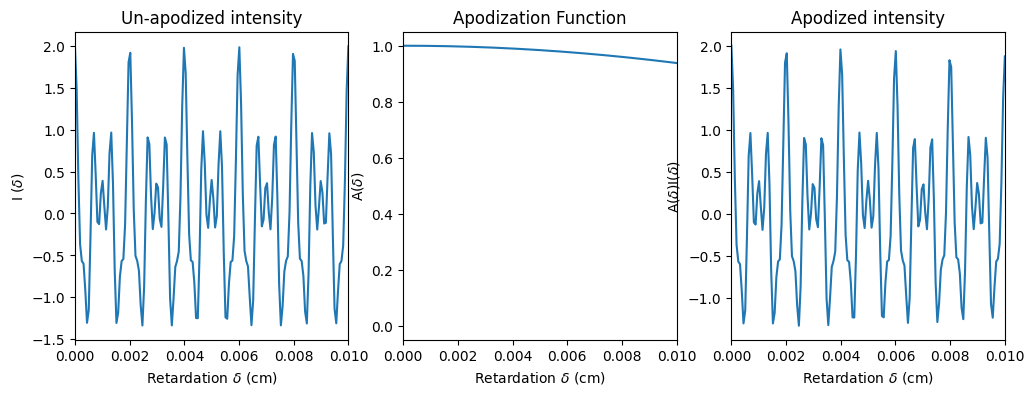

In [32]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
ax[0].plot(deltas,I_delta)
ax[1].plot(deltas,A_delta)
ax[2].plot(deltas,apodized)
for a in ax:
  a.set_xlim(0,0.01)

## Exercise 3: Interferograms from real spectra (no required graded answers in this section)
Here we will start with a real spectrum and construct its interferogram. Below are two CSV files - one for an FTIR spectrum of Polystyrene, and one for its background. Both are available in the Class Repo (note that file link has changed from class notes; in class notes I had it pointing to my Google Drive. You would need to download the files and upload them into your Google Drive for that to work correctly)

In [22]:
# define the filenames
file_PS = '/Polystyrene.csv'
file_bg = '/BackgroundSpectrum.csv'

In [23]:
# load the files into dataframes with Pandas
PS_loaded = pd.read_csv(file_PS,header=0)
bg_loaded = pd.read_csv(file_bg,header=0)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We've loaded these into dataframes. Let's first plot and inspect what we have loaded. Note that I have changed the x-axis limits to go from high to low wavenumber left to right, since this is how it is typically presented.

Text(0.5, 1.0, 'Polystyrene FTIR Spectrum')

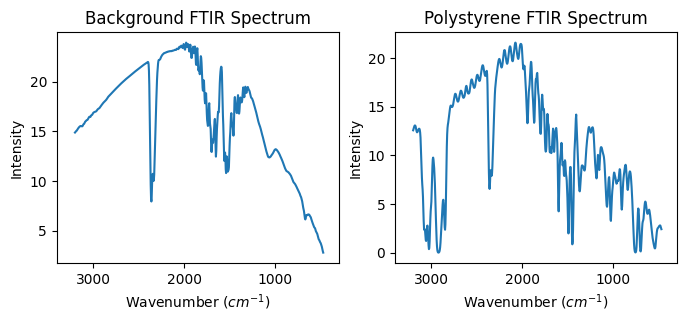

In [24]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(bg_loaded['Wavenumber'], bg_loaded['Intensity'])
ax[1].plot(PS_loaded['Wavenumber'], PS_loaded['Intensity'])

for a in ax:
    a.set_xlabel('Wavenumber $(cm^{-1})$')
    a.set_xlim(3400,300)
    a.set_ylabel('Intensity')

ax[0].set_title('Background FTIR Spectrum'); ax[1].set_title('Polystyrene FTIR Spectrum')

To simplify calculations, I am making all of the data into NumPy arrays. This results in a lot of variables, and can be done in a more elegant fashion - but we will just do this for today.

In [33]:
h_cm = lambda_HeNe * 10**-7
ks = np.linspace(0,988,num=989,dtype=int)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm , indexing -1 turns up the last value in the array

In [34]:
n_wns_bg = np.asarray(bg_loaded['DataPoint'])
wns_bg = np.asarray(bg_loaded['Wavenumber'])
Is_bg = np.asarray(bg_loaded['Intensity'])

In [35]:
I_delta_bg = np.zeros(len(deltas))
for i in range(len(n_wns_bg)):
  I_delta_bg += Is_bg[i] * np.cos(2 * np.pi * wns_bg[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_bg = I_delta_bg*A_delta

Calculating the interferogram for the PS

In [36]:
n_wns_ps = np.asarray(PS_loaded['DataPoint'])
wns_ps = np.asarray(PS_loaded['Wavenumber'])
Is_ps = np.asarray(PS_loaded['Intensity'])

In [37]:
# at each delta, we will have the sum of I_delta at all 709 wavenumbers. After we get this, we multiply it by the apodized function

In [38]:
I_delta_ps = np.zeros(len(deltas))
for i in range(len(n_wns_ps)):
  I_delta_ps += Is_ps[i] * np.cos(2 * np.pi * wns_ps[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_ps = I_delta_ps * A_delta

Plotting both

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1452738767.py:5: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel('Retardation $\delta$')


Text(0.5, 1.0, 'Interferograms for measured spectra')

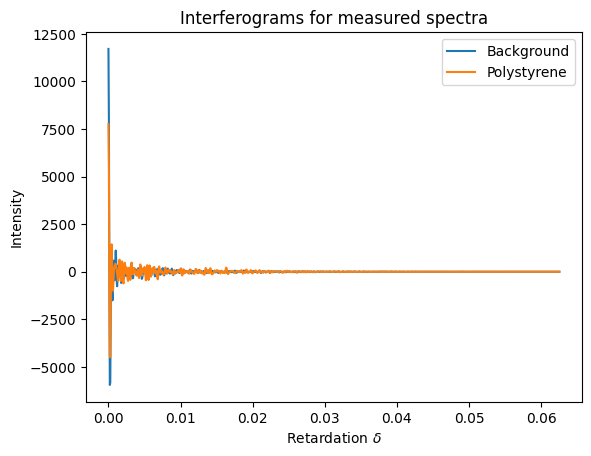

In [39]:
fig, ax = plt.subplots()
ax.plot(deltas, interferogram_bg,label='Background')
ax.plot(deltas, interferogram_ps,label='Polystyrene')
ax.legend()
ax.set_xlabel('Retardation $\delta$')
ax.set_ylabel('Intensity')
ax.set_title('Interferograms for measured spectra')

## Exercise 4: Turning interferograms into spectra
In the previous exercises, we worked backwards from a spectrum (the type you would see in a publication) and made a corresponding interferogram. Now, we will do what the spectrometer does, and turn the measured interferogram into a Spectrum (like you see in a publication). We will start off with a bit of math again.

The equation for the continuous Fourier Transform is:  
<font size=4>$B(\bar{\nu}) = \int_{-\infty}^{\infty}I(\delta)A(\delta)cos(2\pi\bar{/nu}\delta \cdotp d\delta)$ <font color='grey'> (Equation 3) </font>  </font>  
It requires that the retardation $\delta$ must extend from negative to positive infinity. This is impossible, which is why the apodization function needs to be applied.  
<font color='blue'>As explained earlier, the apodization function causes the interferogram intensity to decrease in a way that mimics one that extends to infinite retardation. $I(\delta)A(\delta)$ in Equation 3 is the apodized interferogram. </font>

The sampling interval impacts the resolution. The larger the sampling interval, the more information is lost when the interferogram is converted into a spectrum. This has to do with the Nyquist sampling criterion, which will be an exercise left for later.

As Equation 3 has an integral, it requires continuous sampling, which we do not do in a real experiment.  Therefore, we must use Equation 4 for discrete sampling:  
<font size=4>$B'(\bar{\nu}_1) = I_{a}(0) + 2I_{a}(1)cos(2\pi\bar{\nu_{1}} \cdotp h) + 2I_{a}(2)cos(2\pi\bar{\nu_{1}} \cdotp 2h) + ... + 2I_{a}(N-1)cos(2\pi\bar{\nu_{1}} \cdotp (N-1)h) $ <font color='grey'> (Equation 4a)

Which can be rewritten more elegantly in summation notation (we will also refer to this as Equation 4):  
<font size=4>$B'(\bar{\nu}_1) = I_{a}(0) + 2\sum_{k=1}^{N-1}I_{a}(k)cos(2\pi\bar{\nu_{1}} \cdotp kh) $ <font color='grey'> (Equation 4b) </font> </font>   
Where h is still the sampling interval determined by the wavelength as in previous sections, and N (indexed by k in this equation) is still the total number of data points in the interferogram.

### Calculate the intensity of a given test wavenumber in an interferogram.

Premise: When we take an interferogram, we are trying to determine what the dominant frequencies that show up in it are. Therefore, we want to see: are there any modes with wavenumber = $x~cm^{-1}$?

First, to illustrate, we will generate an interferogram from a single wavenumber, $1500~cm^{-1}$. This is exactly what we did above; therefore I have just copy-pasted. I have named the variable "interferogram_mystery" since we're about to "try to find out" what frequencies are in the signal.

In [40]:
h_cm = 6.328e-5 #cm (from above)
ks = np.linspace(0,988,989)
deltas = ks * h_cm
B_1 = 0.8
wavenumber = 1500 # inv cm
Delta_max = (1/16) * ks[-1] # cm
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
I_delta = B_1 * np.cos(2 * np.pi * wavenumber * deltas)
interferogram_mystery = I_delta * A_delta

Now, let's say we want to know: Is $2000~cm^{-1}$ included in this interferogram? You and I know, since we made the interferogram from a $1500~cm^{-1}$ wavenumber, that it is not. However, we will "try". This is what your analysis code will do for each test wavenumber. Here, $2000~cm^{-1}$ is the "test wavenumber" that we want to find the intensity of. **Before** we start testing with the Fourier transform, we will plot the apodized spectrum for $2000~cm^{-1}$ on top so you know what to expect.

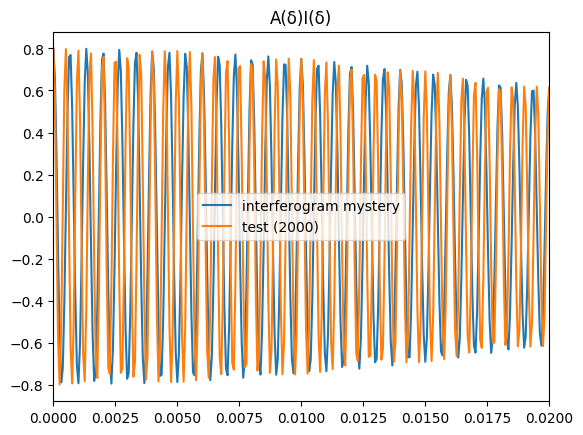

In [41]:
test_wn = 2000.
I_test = 0.8 * np.cos(2 * np.pi * test_wn * deltas)
interferogram_2000 = I_test * A_delta
fig, ax = plt.subplots()
ax.plot(deltas,interferogram_mystery,label='interferogram mystery')
ax.plot(deltas,interferogram_2000,label='test (2000)')
ax.set_xlim(0,0.02)
ax.set_title('A(δ)I(δ)')
ax.legend()

We can tell that this test wavenumber ($2000~cm^{-1}$) isn't part of the interferogram.

Next we take the product of the interferogram and the test wavenumber to see where they coincide. If the frequency is **not** contained in the interferogram,then the sum of this will be 0.

In [44]:
test_wn = 2000
testing = 2*np.cos(2 * np.pi * test_wn * deltas) # except it's not correct for the first one
testing[0] = np.cos(2 * np.pi * test_wn * deltas[0])
testing = testing * interferogram_mystery

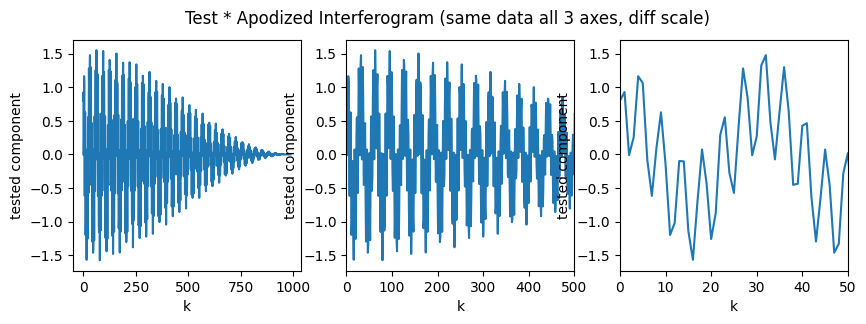

The sum of the product of the mystery interferogram and the test wavenumber is -0.0005124727669280071.
This is close to 0, indicating that the test wavenumber is not in the interferogram


In [45]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
for a in ax:
  a.plot(testing)
  a.set_xlabel('k')
  a.set_ylabel('tested component')

ax[1].set_xlim(0,500)
ax[2].set_xlim(0,50)
plt.suptitle('Test * Apodized Interferogram (same data all 3 axes, diff scale)')
plt.show()
print(f'The sum of the product of the mystery interferogram and the test wavenumber is {np.sum(testing)}.')
print('This is close to 0, indicating that the test wavenumber is not in the interferogram')

<font size=4> Pay attention to the print statement above (it shows up very small right below the graph). It includes the term np.sum(testing), which adds up every term in the array that is the product of the test wavenumber and the interferogram being tested.

### Testing all wavenumbers for a 3-number spectrum
Now, we're going to set up systematically testing many wavenumbers in an interferogram at once. We will start with our 3-wavenumber interferogram from the 1st part.

In [3]:
Bs = np.array([0.8,0.5, 0.7])
wns = np.array([1500,3000, 1000])

In [4]:
# your code here
h_cm = 6.328e-5 #cm (from above)
ks = np.linspace(0,988,989)
deltas = ks * h_cm
# removed the previous single-valued B1 and wavenumber
Delta_max = (1/16) * ks[-1] # cm

In [5]:
# your code here
I_delta = np.zeros(len(ks))
for i in range(len(Bs)):
  I_delta += Bs[i] * np.cos(2 * np.pi * wns[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_3wn = A_delta * I_delta

We define a range of wavenumbers that we're going to test. We can choose the start and stop based on our instrumental limits; you can experiment with resolution.

In [6]:
wns_to_test = np.linspace(start=500.,stop=3200.,num=28)
wns_to_test

array([ 500.,  600.,  700.,  800.,  900., 1000., 1100., 1200., 1300.,
       1400., 1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200.,
       2300., 2400., 2500., 2600., 2700., 2800., 2900., 3000., 3100.,
       3200.])

In [7]:
wns_to_test = np.linspace(500.,3200.,28)
rels = np.zeros(len(wns_to_test))
for i in range(len(wns_to_test)): # do this once for every wavenumber
  testing = 2*np.cos(2 * np.pi * wns_to_test[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_to_test[i] * deltas[0])
  testing = testing * interferogram_3wn
  rels[i] = np.sum(testing)

Text(0.5, 1.0, 'Frequencies that compose our 3-wavenumber interferogram')

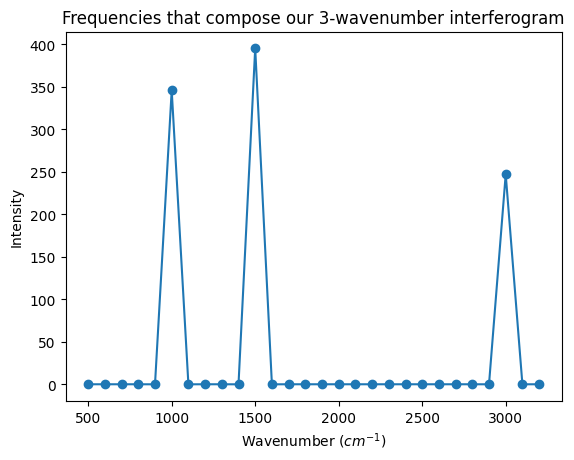

In [8]:
fig, ax = plt.subplots()
ax.plot(wns_to_test,rels,'-o')
ax.set_xlabel('Wavenumber $(cm^{-1}$)')
ax.set_ylabel('Intensity')
ax.set_title('Frequencies that compose our 3-wavenumber interferogram')

Better resolution:

Text(0.5, 1.0, 'Frequencies that compose our 3-wavenumber interferogram')

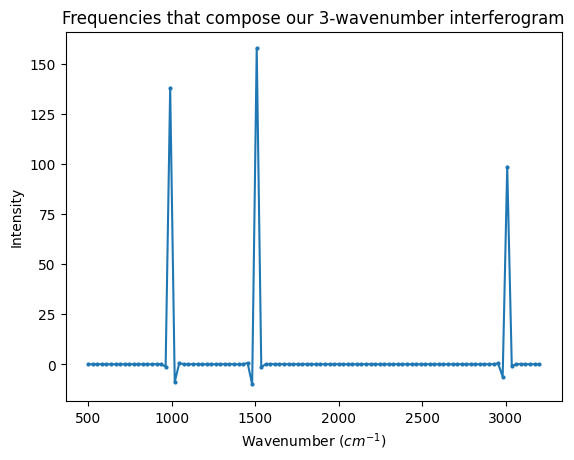

In [9]:
wns_to_test = np.linspace(500.,3200.,100)
rels = np.zeros(len(wns_to_test))
for i in range(len(wns_to_test)):
  testing = 2*np.cos(2 * np.pi * wns_to_test[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_to_test[i] * deltas[0])
  testing = testing * interferogram_3wn
  rels[i] = np.sum(testing)
fig, ax = plt.subplots()
ax.plot(wns_to_test,rels,'-o',markersize=2)
ax.set_xlabel('Wavenumber $(cm^{-1}$)')
ax.set_ylabel('Intensity')
ax.set_title('Frequencies that compose our 3-wavenumber interferogram')

### Performing this for a real interferogram
Finally, we will convert the interferograms from Exercise 3 back into FTIR spectra. First, let's look at them:

Text(0, 0.5, 'Intensity')

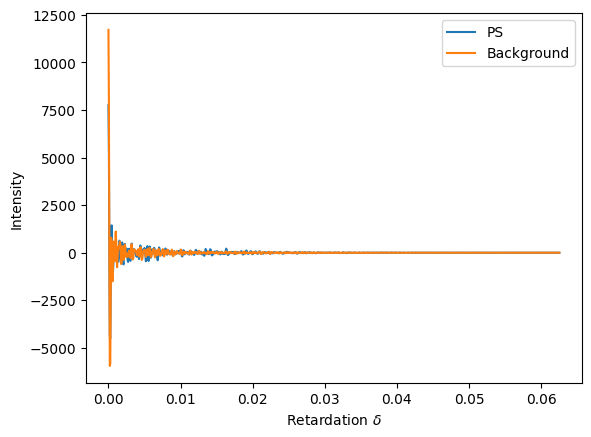

In [43]:
fig, ax = plt.subplots()
ax.plot(deltas, interferogram_ps,label='PS')
ax.plot(deltas, interferogram_bg,label='Background')
ax.legend()
ax.set_xlabel('Retardation $\\delta$')
ax.set_ylabel('Intensity')

### <font color='red'>Now, do the same procedure as above - Generate an FTIR spectrum for both the PS and the background measurement, as transmittance vs. wavenumber
You should obtain real-looking FTIR spectra. The plotting code has been provided.

(3400.0, 400.0)

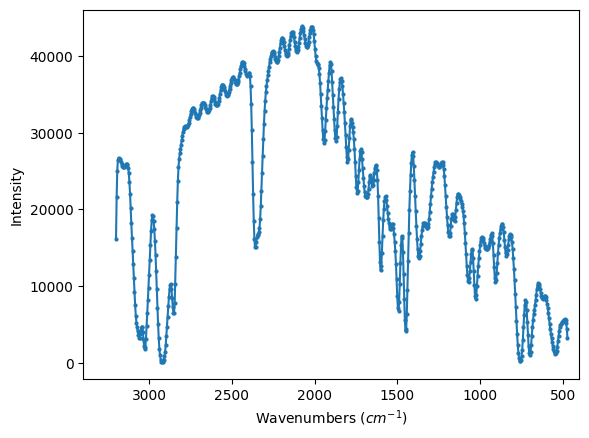

In [72]:
# your code here - Polystyrene
# Constants
h_cm = lambda_HeNe * 10**-7
ks = np.linspace(0,988,num=989,dtype=int)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm , indexing -1 turns up the last value in the array

# Load Polystyrene
n_wns_ps = np.asarray(PS_loaded['DataPoint'])
wns_ps = np.asarray(PS_loaded['Wavenumber'])
Is_ps = np.asarray(PS_loaded['Intensity'])

I_delta = np.zeros(len(ks))
for i in range(len(Is_ps)):
  I_delta += Is_ps[i] * np.cos(2 * np.pi * wns_ps[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_ps = A_delta * I_delta

# Test
rels = np.zeros(len(wns_ps))
for i in range(len(wns_ps)):
  testing = 2*np.cos(2 * np.pi * wns_ps[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_ps[i] * deltas[0])
  testing = testing * interferogram_ps
  rels[i] = np.sum(testing)

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.plot(wns_ps,rels,'-o',markersize=2)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Intensity')
ax.set_xlim(3400,400)

(3400.0, 400.0)

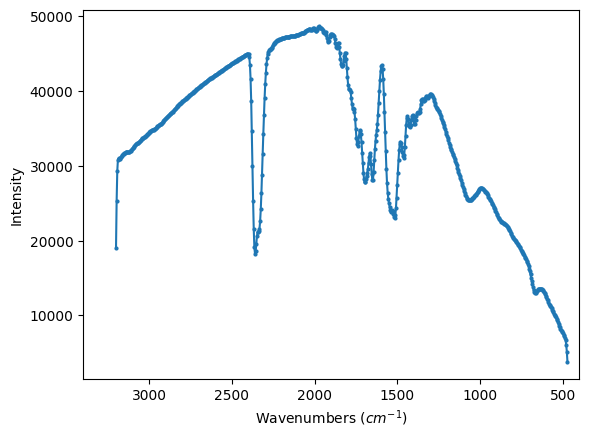

In [73]:
# your code here - Background
# Constants
h_cm = lambda_HeNe * 10**-7
ks = np.linspace(0,988,num=989,dtype=int)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm , indexing -1 turns up the last value in the array

# Load Background
n_wns_bg = np.asarray(bg_loaded['DataPoint'])
wns_bg = np.asarray(bg_loaded['Wavenumber'])
Is_bg = np.asarray(bg_loaded['Intensity'])

I_delta = np.zeros(len(ks))
for i in range(len(Is_bg)):
  I_delta += Is_bg[i] * np.cos(2 * np.pi * wns_bg[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_bg = A_delta * I_delta


# Test
rels = np.zeros(len(wns_bg))
for i in range(len(wns_bg)):
  testing = 2*np.cos(2 * np.pi * wns_bg[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_bg[i] * deltas[0])
  testing = testing * interferogram_bg
  rels[i] = np.sum(testing)

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.plot(wns_bg,rels,'-o',markersize=2)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Intensity')
ax.set_xlim(3400,400)

## Part 2: Further Analysis

### <font color='red'>Q1.
<font size=4> Write a user-defined function to return an apodized spectrum from a given list of wavenumbers and intensities (ν & B). This will help simplify the notebook. Hint: examine the code we used throughout the exercise. Identify what we repeated over and over; this can go into the user-defined function.

In [59]:
# your code here (add cells as necessary)
def Gen_Apodized(v, B):
  # constants
  h_cm = 6.328e-5 #cm (from above)
  ks = np.linspace(0,988,989)
  deltas = ks * h_cm
  Delta_max = (1/16) * ks[-1] # cm

  I_delta = np.zeros(len(ks))
  for i in range(len(B)):
    I_delta += B[i] * np.cos(2 * np.pi * v[i] * deltas)
  A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
  apodized = A_delta * I_delta
  return apodized


In [61]:
# your code here - demonstrate how your function works
Bs = np.array([0.8,0.5, 0.7])
wns = np.array([1500,3000, 1000])

Gen_Apodized(wns,Bs)

array([ 2.00000000e+00,  1.49181124e+00,  4.21547025e-01, -3.68040876e-01,
       -5.66382964e-01, -5.98693992e-01, -9.13086109e-01, -1.30280288e+00,
       -1.14880011e+00, -2.75479116e-01,  6.90819900e-01,  9.61622036e-01,
        4.66862756e-01, -1.00834507e-01, -1.26480850e-01,  2.42219064e-01,
        3.89353427e-01,  8.86622425e-02, -1.90079786e-01,  7.90283927e-02,
        7.18141410e-01,  9.63557419e-01,  3.57201553e-01, -6.79403739e-01,
       -1.30287245e+00, -1.17836246e+00, -7.50661726e-01, -5.65575058e-01,
       -5.41367096e-01, -1.29187769e-01,  8.51843880e-01,  1.79896038e+00,
        1.91009733e+00,  1.08490119e+00,  3.99617958e-02, -5.03416641e-01,
       -5.62509959e-01, -6.81176713e-01, -1.08774255e+00, -1.33024800e+00,
       -8.67205298e-01,  1.45311018e-01,  9.02756162e-01,  8.26275780e-01,
        2.03962561e-01, -1.85457484e-01,  4.63130313e-03,  3.54269097e-01,
        3.08775705e-01, -6.19510473e-02, -1.58359933e-01,  3.22373567e-01,
        8.99329744e-01,  

### <font color='red'> Q2.
<font size=4>In the assignment, we have FTIR spectra/interferograms from both a polystyrene (PS) sample and its background measurement. A spectrum published as part of a research paper should be background subtracted. We did not explicitly subtract the background in class. Please do the following:

#### <font color='red'> A)
<font size=4>Subtract the background interferogram from the PS interferogram and convert into an FTIR spectrum.

In [65]:
wns_ps = np.asarray(PS_loaded['Wavenumber']) - np.asarray(bg_loaded['Wavenumber'])

(3400.0, 400.0)

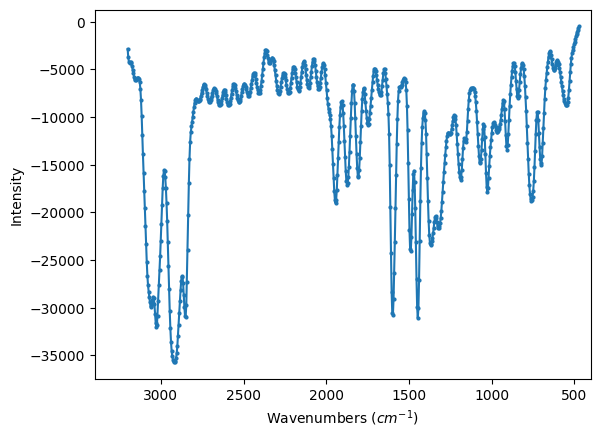

In [74]:
# your code here (add cells as necessary)
# Constants
h_cm = lambda_HeNe * 10**-7
ks = np.linspace(0,988,num=989,dtype=int)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm , indexing -1 turns up the last value in the array

# Load Polystyrene
n_wns_ps = np.asarray(PS_loaded['DataPoint'])
wns_ps = np.asarray(PS_loaded['Wavenumber'])
Is_ps = np.asarray(PS_loaded['Intensity']) - np.asarray(bg_loaded['Intensity'])

I_delta = np.zeros(len(ks))
for i in range(len(Is_ps)):
  I_delta += Is_ps[i] * np.cos(2 * np.pi * wns_ps[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_3wn = A_delta * I_delta

# Test wavenumbers
rels = np.zeros(len(wns_ps))
for i in range(len(wns_ps)):
  testing = 2*np.cos(2 * np.pi * wns_ps[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_ps[i] * deltas[0])
  testing = testing * interferogram_3wn
  rels[i] = np.sum(testing)

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.plot(wns_ps,rels,'-o',markersize=2)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Intensity')
ax.set_xlim(3400,400)

#### <font color='red'> B)
<font size=4>Convert the two interferograms into FTIR spectra and subtract the background spectrum from the PS spectrum. Is the answer the same as in part A?

(3400.0, 400.0)

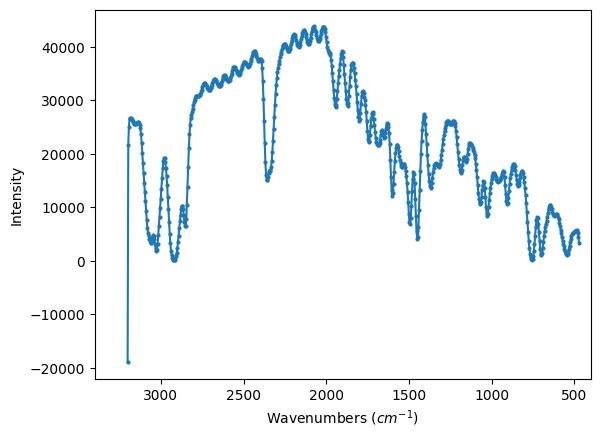

In [86]:
# your code here (add cells as necessary)
# Constants
h_cm = lambda_HeNe * 10**-7
ks = np.linspace(0,988,num=989,dtype=int)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm , indexing -1 turns up the last value in the array

#### Load data
# Load Polystyrene
n_wns_ps = np.asarray(PS_loaded['DataPoint'])
wns_ps = np.asarray(PS_loaded['Wavenumber'])
Is_ps = np.asarray(PS_loaded['Intensity'])
# Load Background
n_wns_bg = np.asarray(bg_loaded['DataPoint'])
wns_bg = np.asarray(bg_loaded['Wavenumber'])
Is_bg = np.asarray(bg_loaded['Intensity'])

I_delta = np.zeros(len(ks))

# Polystyrene
for i in range(len(Is_ps)):
  I_delta += Is_ps[i] * np.cos(2 * np.pi * wns_ps[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_ps = A_delta * I_delta
# convert to spectrum
rels_ps = np.zeros(len(wns_ps))
for i in range(len(wns_ps)):
  testing_p = 2*np.cos(2 * np.pi * wns_ps[i] * deltas) # except it's not correct for the first one
  testing_p[0] = np.cos(2 * np.pi * wns_ps[i] * deltas[0])
  testing_p = testing_p * interferogram_ps
  rels_ps[i] = np.sum(testing_p)

# Background
for i in range(len(Is_bg)):
  I_delta += Is_bg[i] * np.cos(2 * np.pi * wns_bg[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_bg = A_delta * I_delta
#
rels_bg = np.zeros(len(wns_bg))
for j in range(len(wns_bg)):
  testing_bg = 2*np.cos(2 * np.pi * wns_bg[j] * deltas) # except it's not correct for the first one
  testing_bg[0] = np.cos(2 * np.pi * wns_bg[j] * deltas[0])
  testing_bg = testing_bg * interferogram_bg
  rels_bg[i] = np.sum(testing_bg)

#subrate date
for k in range(len(wns_bg)):
  rels[k] = rels_ps[k] - rels_bg[k]

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.plot(wns_ps,rels,'-o',markersize=2)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Intensity')
ax.set_xlim(3400,400)

<font color='red'> No it is not the same results

#### <font color='red'> C) **Mandatory for 7530 only**
<font size=4>Based on your answer to part B, where you found whether the spectra look the same with the two background subtraction procedures, show why or why not the two should be the same using an informal mathematical proof. You may use LaTeX Markdown in the Jupyter Notebook if you wish; otherwise, if you would prefer to write by hand or in another program, you can insert your work as a .png, .jpg, or .tif into the Jupyter Notebook.

<font color='red'> Your response here, either in LaTeX markdown (click the $\Psi$ icon at the top of this cell) or attached as an image file (click the square icon with mountains/triangles at the top of this cell to prompt a file dialog to insert)



### <font color='red'>Q3.
The equation for absorbance is given by  
$A = log_{10}(\frac{1}{T})$  
Where T is the transmission.

#### <font color='red'> A)
Convert the background-subtracted transmission spectrum you found in Q2 to an absorbance spectrum.

Text(0, 0.5, 'Absorbance')

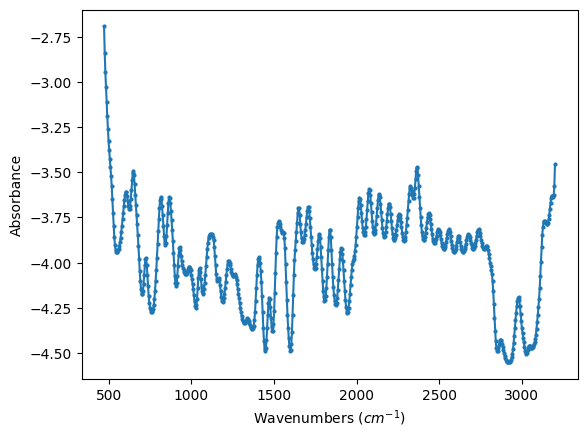

In [94]:
# your code here (add cells as necessary)
# Constants
h_cm = lambda_HeNe * 10**-7
ks = np.linspace(0,988,num=989,dtype=int)
deltas = ks * h_cm
Delta_max = (1/16) * ks[-1] # cm , indexing -1 turns up the last value in the array

# Load Polystyrene
n_wns_ps = np.asarray(PS_loaded['DataPoint'])
wns_ps = np.asarray(PS_loaded['Wavenumber'])
Is_ps = np.asarray(PS_loaded['Intensity']) - np.asarray(bg_loaded['Intensity'])

I_delta = np.zeros(len(ks))
for i in range(len(Is_ps)):
  I_delta += Is_ps[i] * np.cos(2 * np.pi * wns_ps[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_3wn = A_delta * I_delta

# Test wavenumbers
rels = np.zeros(len(wns_ps))
for i in range(len(wns_ps)):
  testing = 2*np.cos(2 * np.pi * wns_ps[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_ps[i] * deltas[0])
  testing = testing * interferogram_3wn
  rels[i] = np.sum(testing)

# absorbance spectrum
Abs = np.zeros(len(wns_ps))
for k in range(len(wns_ps)):
  T = np.abs(rels[k])
  Abs[k] = np.log10(1/T)
#print(Abs)

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.plot(wns_ps,Abs,'-o',markersize=2)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Absorbance')

#### <font color='red'>B)
Explain: what are the relative merits of using absorbance vs. transmittance? Please write 3-5 sentences on the benefits and drawbacks of the two types of display. Full credit for well-reasoned answers.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

<font size=4>**For the following two questions, the instructions are different for 7530 and 5995.** Please closely read to ensure you are completing the right question. The setup and main question is the same for both, but 7530 students must use extra code. 5995 students may do the 7530 parts for extra credit (up to 100% on the assignment).

<font size=4> <font color='blue'> Because the code/markdown patterns are substantially different, there is a "7530" section and a "5995" section. Please only fill out the section corresponding to your course enrollment. If you are in 5995 and wish to complete the 7530 instead for extra credit, fill out the 7530 section.

## **7530 Q4 and Q5**

### <font color='red'>Q4.
<font size=4>In an FTIR spectrometer, the sample is placed in between the interferometer (after the beams recombine) and the detector. Pretend that there are three other locations where the sample could be placed – A) in between the source and the beamsplitter, B) between the beam splitter and the stationary mirror, or C) between the beam splitter and the moving mirror. Locations are labeled on the diagram. For each of these three cases, would you recover a proper IR spectrum, and why or why not? Assume that for all cases, a background spectrum is taken in the same location.

#### <font color='red'>A)
<font size=4>In between the source and the beamsplitter.

In [97]:
def delta_to_I(deltas,wl,I_0=1):
  return I_0 * 0.5 * (1 + np.cos(2 * np.pi * deltas / wl))

Text(0, 0.5, 'Intensity')

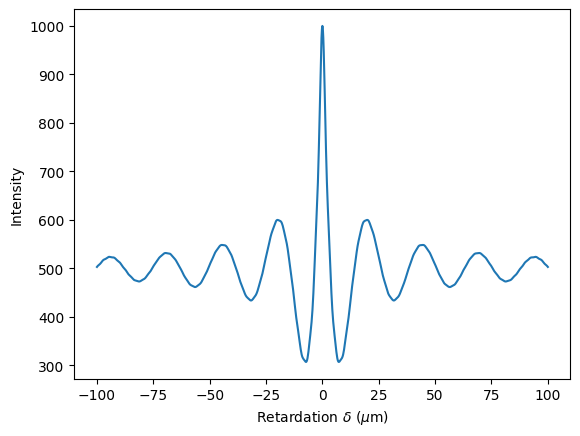

In [98]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  single_wl_int = delta_to_I(deltas,wl)
  interferogram += delta_to_I(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

<font color='red'> Anwser: Yes, we would get a IR spectrum. The entire beam is absorbed before it reaches the interferometer and the interference still works normally.


#### <font color='red'>B)
<font size=4>Between the beam splitter and the stationary mirror.

In [106]:
def delta_to_I_caseB(deltas, wl, I_0=1):
    # Direct intensities in each arm
    I_1 = I_0 * 0.5
    I_2 = I_0

    I_F = 2 * np.sqrt(I_1 * I_2) * np.cos(2 * np.pi * deltas / wl)

    I_t = 0.5 * (I_1 + I_2 + I_F)
    return I_t

Text(0, 0.5, 'Intensity')

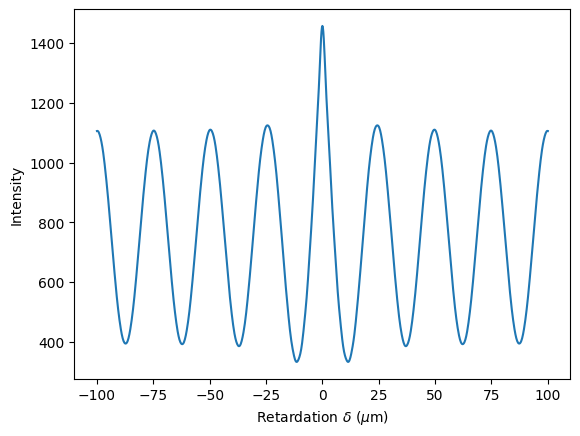

In [115]:
# your code here (add cells as necessary)
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  #single_wl_int = delta_to_I_caseB(deltas,wl)
  interferogram += delta_to_I_caseB(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

<font color='red'> Anwser: No, we would get a IR spectrum. Only the portion of the beam traveling toward the stationary mirror passes through the sample.
 The final results are distortioned in the interferogram and amplitude is imbalance and shifts.


#### <font color='red'>C)
<font size=4>In between the beam splitter and the moving mirror.

In [113]:
# your code here (add cells as necessary)
def delta_to_I_caseC(deltas, wl, I_0=1):
    I_1 = I_0
    I_2 = I_0 * 0.5
    I_f = 2 * np.sqrt(I_1 * I_2) * np.cos(2 * np.pi * deltas / wl)
    I_t = 0.5 * (I_1 + I_2 + I_F)
    return I_t

Text(0, 0.5, 'Intensity')

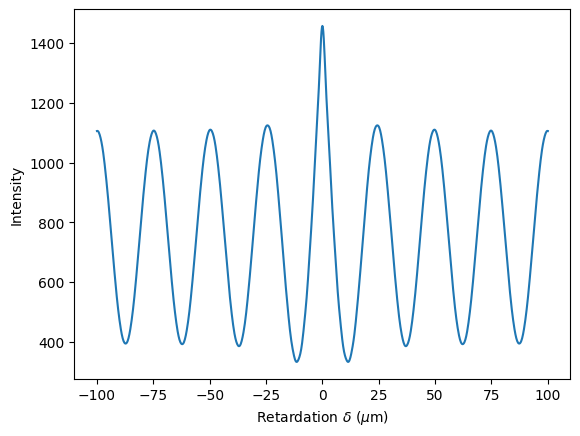

In [116]:
# your code here (add cells as necessary)
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  #single_wl_int = delta_to_I_caseB(deltas,wl)
  interferogram += delta_to_I_caseC(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

<font color='red'> Anwser: No, we would get a IR spectrum. Only the portion of the beam traveling toward the moving mirror passes through the sample. The recombined beam contains unequal contributions, leading to interferogram distortions.

### <font color='red'>Q5.
<font size=4>Error analysis. Consider the following four situations and how the recorded FTIR spectrum would change (or not):

#### <font color='red'>A)
<font size=4>The moving mirror is scratched and only reflects half of the incoming light.

In [120]:
 # One arm intensity reduced by 50%
def delta_to_I_case_a(deltas, wl, I_0=1):
    I_1 = I_0 * 0.5
    I_2 = I_0
    I_F = 2 * np.sqrt(I_1 * I_2) * np.cos(2*np.pi*deltas/wl)
    I_t = 0.5 * (I_1 + I_2 + I_F)
    return I_t

Text(0, 0.5, 'Intensity')

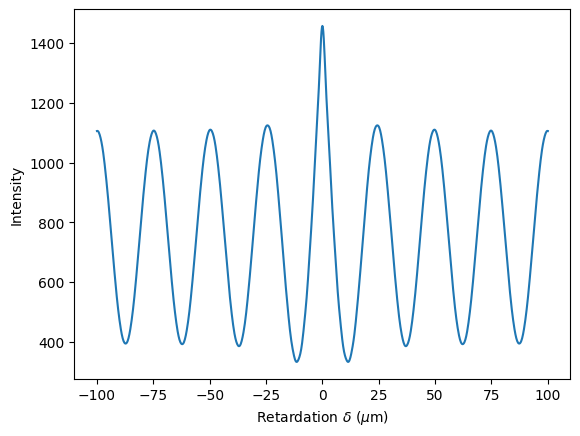

In [121]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  #single_wl_int = delta_to_I_caseB(deltas,wl)
  interferogram += delta_to_I_case_a(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> The IR is changed and the scratch cause a distorted spectra.

#### <font color='red'>B)
<font size=4>Both the moving and stationary mirror are (magically) scratched exactly the same amount and only reflect half of the incoming light.

In [124]:
# your code here (add cells as necessary)
 # One arm intensity reduced by 50%
def delta_to_I_case_b(deltas, wl, I_0=1):
    I_1 = I_0
    I_2 = I_0 * 0.5
    I_F = 2 * np.sqrt(I_1 * I_2) * np.cos(2*np.pi*deltas/wl)
    I_t = 0.5 * (I_1 + I_2 + I_F)
    return I_t

Text(0, 0.5, 'Intensity')

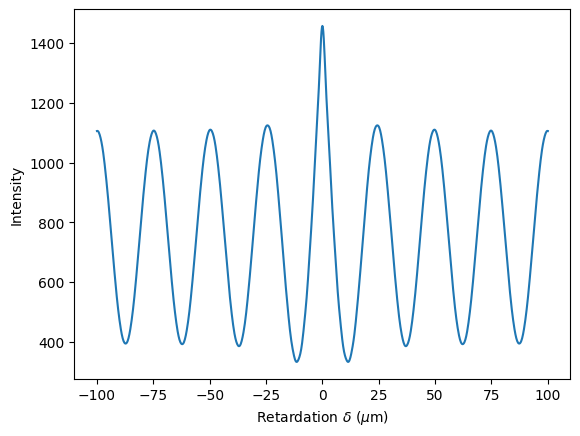

In [125]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  #single_wl_int = delta_to_I_caseB(deltas,wl)
  interferogram += delta_to_I_case_b(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> The value is changed and there is a reduction in signal amplitude and there is a distorting to the spectra.

#### <font color='red'>C)
<font size=4>The motor for the mirror is faulty, and it sometimes did not move in between collecting data points. (Hint: think about the role of the HeNe laser in this)

In [134]:
# your code here (add cells as necessary)
def delta_to_I_case_c(deltas, wl, I_0=1):
    stuck_deltas = np.round(deltas / 2) * 2
    return I_0 * 0.5 * (1 + np.cos(2 * np.pi * stuck_deltas / wl))

Text(0, 0.5, 'Intensity')

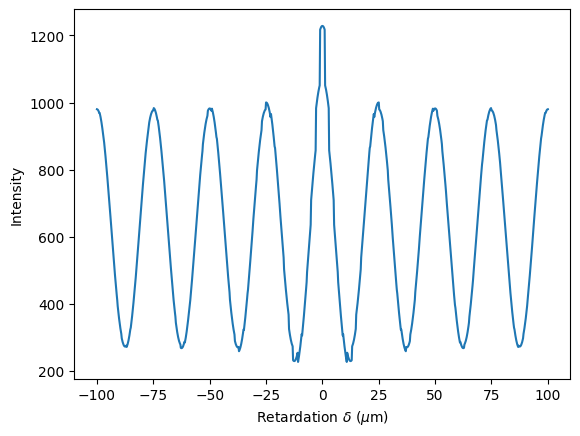

In [135]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  #single_wl_int = delta_to_I_caseB(deltas,wl)
  interferogram += delta_to_I_case_c(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> The faulty motor causes the mirror to stall at points and the retardation steps don’t match. This cause the sample to have a corrupted spectra.

#### <font color='red'>D)
<font size=4>Someone messed up the interferometer and vaporized an IR-active material that contaminated both the stationary and moving mirror.

In [132]:
# your code here (add cells as necessary)
def delta_to_I_case_d(deltas, wl, I_0=1):
    contam = np.exp(-0.5*((wl-6)/0.3)**2)
    T = 1 - 0.5*contam
    return I_0 * T * 0.5 * (1 + np.cos(2*np.pi*deltas/wl))

Text(0, 0.5, 'Intensity')

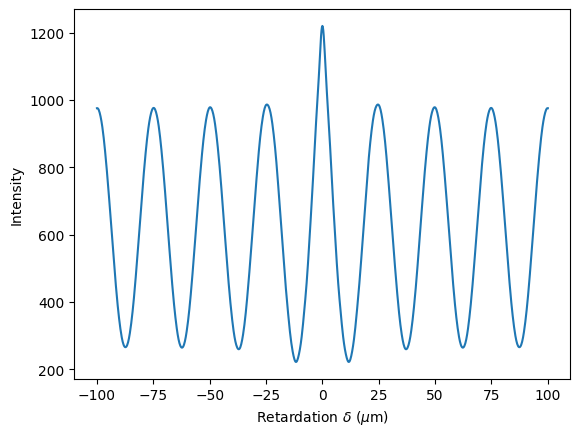

In [133]:
deltas = np.linspace(-100,100, 1001)
wl_spectrum = np.linspace(2.5,25,500)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  #single_wl_int = delta_to_I_caseB(deltas,wl)
  interferogram += delta_to_I_case_d(deltas,wl)
  interferogram = interferogram + single_wl_int # adds to the total  interferogram
#plot
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Contamination of both mirrors with an IR-active material causes extra absorption points and producing false peaks in final product.

### **5995 Q4 and Q5**

### <font color='red'>Q4.
<font size=4>In an FTIR spectrometer, the sample is placed in between the interferometer (after the beams recombine) and the detector. Pretend that there are three other locations where the sample could be placed – A) in between the source and the beamsplitter, B) between the beam splitter and the stationary mirror, or C) between the beam splitter and the moving mirror. Locations are labeled on the diagram. For each of these three cases, would you recover a proper IR spectrum, and why or why not? Assume that for all cases, a background spectrum is taken in the same location.

#### <font color='red'>A)
<font size=4>In between the source and the beamsplitter.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

#### <font color='red'>B)
<font size=4>Between the beam splitter and the stationary mirror.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

#### <font color='red'>C)
<font size=4>In between the beam splitter and the moving mirror.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

### <font color='red'>Q5.
<font size=4>Error analysis. Consider the following four situations and how the recorded FTIR spectrum would change (or not):

#### <font color='red'>A)
<font size=4>The moving mirror is scratched and only reflects half of the incoming light.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

#### <font color='red'>B)
<font size=4>Both the moving and stationary mirror are (magically) scratched exactly the same amount and only reflect half of the incoming light.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

#### <font color='red'>C)
<font size=4>The motor for the mirror is faulty, and it sometimes did not move in between collecting data points. (Hint: think about the role of the HeNe laser in this)

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)

#### <font color='red'>D)
<font size=4>Someone messed up the interferometer and vaporized an IR-active material that contaminated both the stationary and moving mirror.

<font color='red'> Your response here. (In red - don't delete the 'font color" statement at the beginning of the cell.)